# 1. EDA (Exploratory Data Analysis)

## Bank Marketing Dataset - Vadeli Mevduat Tahmini

Bu notebook, Portekiz bankasinin telefon pazarlama kampanyasi verisinin detayli incelemesini icerir.

**Amac:** Musterilerin vadeli mevduat (term deposit) acip acmayacagini tahmin etmek.

**Kaynak:** https://www.kaggle.com/datasets/janiobachmann/bank-marketing-dataset

## Icerik
1. Veri Yukleme ve Ilk Bakis
2. Target Analizi
3. Eksik Deger Analizi
4. Numerik Degisken Analizi
5. Kategorik Degisken Analizi
6. Korelasyon Analizi
7. Feature-Target Iliskisi
8. Bulgular ve Sonuc

In [1]:
# Kutuphaneler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Gorsellestirme ayarlari
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
sns.set_palette('husl')

# Pandas ayarlari
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

print('Kutuphaneler yuklendi!')

Kutuphaneler yuklendi!


---
## 1. Veri Yukleme ve Ilk Bakis

In [2]:
# Veri yolu
DATA_PATH = Path('../data/raw/')

# Veriyi yukle
df = pd.read_csv(DATA_PATH / 'bank.csv')
print(f'Veri yuklendi: {df.shape[0]:,} satir, {df.shape[1]} sutun')

Veri yuklendi: 11,162 satir, 17 sutun


In [3]:
# Ilk 5 satir
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
# Son 5 satir
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [5]:
# Veri tipleri ve bellek kullanimi
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [6]:
# Sutun isimleri
print('Sutunlar:')
for i, col in enumerate(df.columns, 1):
    print(f'{i:2}. {col}')

Sutunlar:
 1. age
 2. job
 3. marital
 4. education
 5. default
 6. balance
 7. housing
 8. loan
 9. contact
10. day
11. month
12. duration
13. campaign
14. pdays
15. previous
16. poutcome
17. deposit


### Degisken Aciklamalari

| Degisken | Tip | Aciklama |
|----------|-----|----------|
| age | Numerik | Musteri yasi |
| job | Kategorik | Meslek turu |
| marital | Kategorik | Medeni durum (married, single, divorced) |
| education | Kategorik | Egitim seviyesi |
| default | Kategorik | Kredi temerrut durumu |
| balance | Numerik | Yillik ortalama bakiye (Euro) |
| housing | Kategorik | Konut kredisi var mi? |
| loan | Kategorik | Bireysel kredi var mi? |
| contact | Kategorik | Iletisim turu |
| day | Numerik | Son iletisim gunu (ayin kacinci gunu) |
| month | Kategorik | Son iletisim ayi |
| duration | Numerik | Son gorusme suresi (saniye) - **DIKKAT: Production'da bilinmez!** |
| campaign | Numerik | Bu kampanyada yapilan arama sayisi |
| pdays | Numerik | Onceki kampanyadan bu yana gecen gun (-1: hic aranmamis) |
| previous | Numerik | Onceki kampanyalarda yapilan arama sayisi |
| poutcome | Kategorik | Onceki kampanya sonucu |
| **deposit** | **Target** | **Vadeli mevduat acti mi? (yes/no)** |

---
## 2. Target Analizi

In [7]:
# Target degisken
TARGET = 'deposit'

# Target dagilimi
print('Target Dagilimi:')
print(df[TARGET].value_counts())
print('\nTarget Oranlari:')
print(df[TARGET].value_counts(normalize=True).round(4) * 100)

Target Dagilimi:
deposit
no     5873
yes    5289
Name: count, dtype: int64

Target Oranlari:
deposit
no     52.62
yes    47.38
Name: proportion, dtype: float64


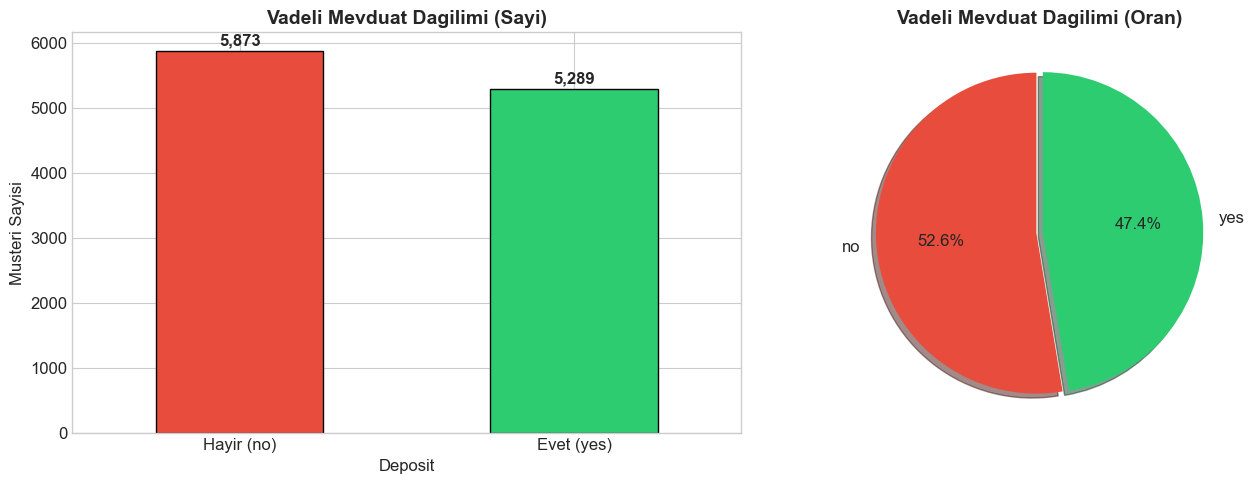


>>> Grafik kaydedildi: docs/target_distribution.png


In [8]:
# Target dagilimi gorsellestirme
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
colors = ['#e74c3c', '#2ecc71']
df[TARGET].value_counts().plot(kind='bar', ax=ax[0], color=colors, edgecolor='black')
ax[0].set_title('Vadeli Mevduat Dagilimi (Sayi)', fontsize=14, fontweight='bold')
ax[0].set_xlabel('Deposit')
ax[0].set_ylabel('Musteri Sayisi')
ax[0].set_xticklabels(['Hayir (no)', 'Evet (yes)'], rotation=0)

# Degerler ekle
for i, v in enumerate(df[TARGET].value_counts().values):
    ax[0].text(i, v + 100, f'{v:,}', ha='center', fontweight='bold')

# Pie chart
df[TARGET].value_counts().plot(kind='pie', ax=ax[1], autopct='%1.1f%%', 
                                colors=colors, explode=(0.02, 0.02),
                                shadow=True, startangle=90)
ax[1].set_title('Vadeli Mevduat Dagilimi (Oran)', fontsize=14, fontweight='bold')
ax[1].set_ylabel('')

plt.tight_layout()
plt.savefig('../docs/target_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print('\n>>> Grafik kaydedildi: docs/target_distribution.png')

### Target Analizi Bulgulari

- **Veri seti dengeli gorunuyor** (yaklasik 47% yes, 53% no)
- Dengesiz veri problemleri icin ozel teknikler (SMOTE, class weights vb.) gerekli olmayabilir
- Ancak yine de stratified sampling kullanmak iyi bir pratiktir

---
## 3. Eksik Deger Analizi

In [9]:
# Eksik deger sayilari
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Eksik Sayi': missing,
    'Eksik Oran (%)': missing_pct.round(2)
}).sort_values('Eksik Oran (%)', ascending=False)

print('Eksik Deger Analizi:')
print(f'Toplam eksik deger: {missing.sum()}')
print(f'\nSutun bazinda eksik degerler:')
missing_df

Eksik Deger Analizi:
Toplam eksik deger: 0

Sutun bazinda eksik degerler:


,Eksik Sayi,Eksik Oran (%)
age,0,0.0
day,0,0.0
poutcome,0,0.0
previous,0,0.0
pdays,0,0.0
campaign,0,0.0
duration,0,0.0
month,0,0.0
contact,0,0.0
job,0,0.0


In [10]:
# "unknown" degerlerini kontrol et (eksik deger gibi davranabilir)
print('"unknown" Degerleri:')
for col in df.select_dtypes(include='object').columns:
    unknown_count = (df[col] == 'unknown').sum()
    if unknown_count > 0:
        print(f'{col}: {unknown_count:,} ({unknown_count/len(df)*100:.2f}%)')

"unknown" Degerleri:
job: 70 (0.63%)
education: 497 (4.45%)
contact: 2,346 (21.02%)
poutcome: 8,326 (74.59%)


### Eksik Deger Bulgulari

- **Teknik olarak eksik deger YOK** (null/NaN)
- Ancak bazi kategorik degiskenlerde **"unknown"** degeri var:
  - `contact`: Iletisim turu bilinmiyor
  - `poutcome`: Onceki kampanya sonucu bilinmiyor
  - `education`: Egitim seviyesi bilinmiyor
- **pdays = -1**: Musteri daha once hic aranmamis (ozel bir deger)

**Strateji:**
- "unknown" degerlerini ayri bir kategori olarak tutabiliriz
- veya mode ile doldurma dusunulebilir (EDA sonrasi karar verilecek)

---
## 4. Numerik Degisken Analizi

In [11]:
# Numerik sutunlar
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f'Numerik sutun sayisi: {len(num_cols)}')
print(f'Sutunlar: {num_cols}')

Numerik sutun sayisi: 7
Sutunlar: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [12]:
# Temel istatistikler
df[num_cols].describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.23,11.91,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.54,3225.41,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.66,8.42,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.99,347.13,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.51,2.72,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.33,108.76,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.83,2.29,0.0,0.0,0.0,1.00,58.0


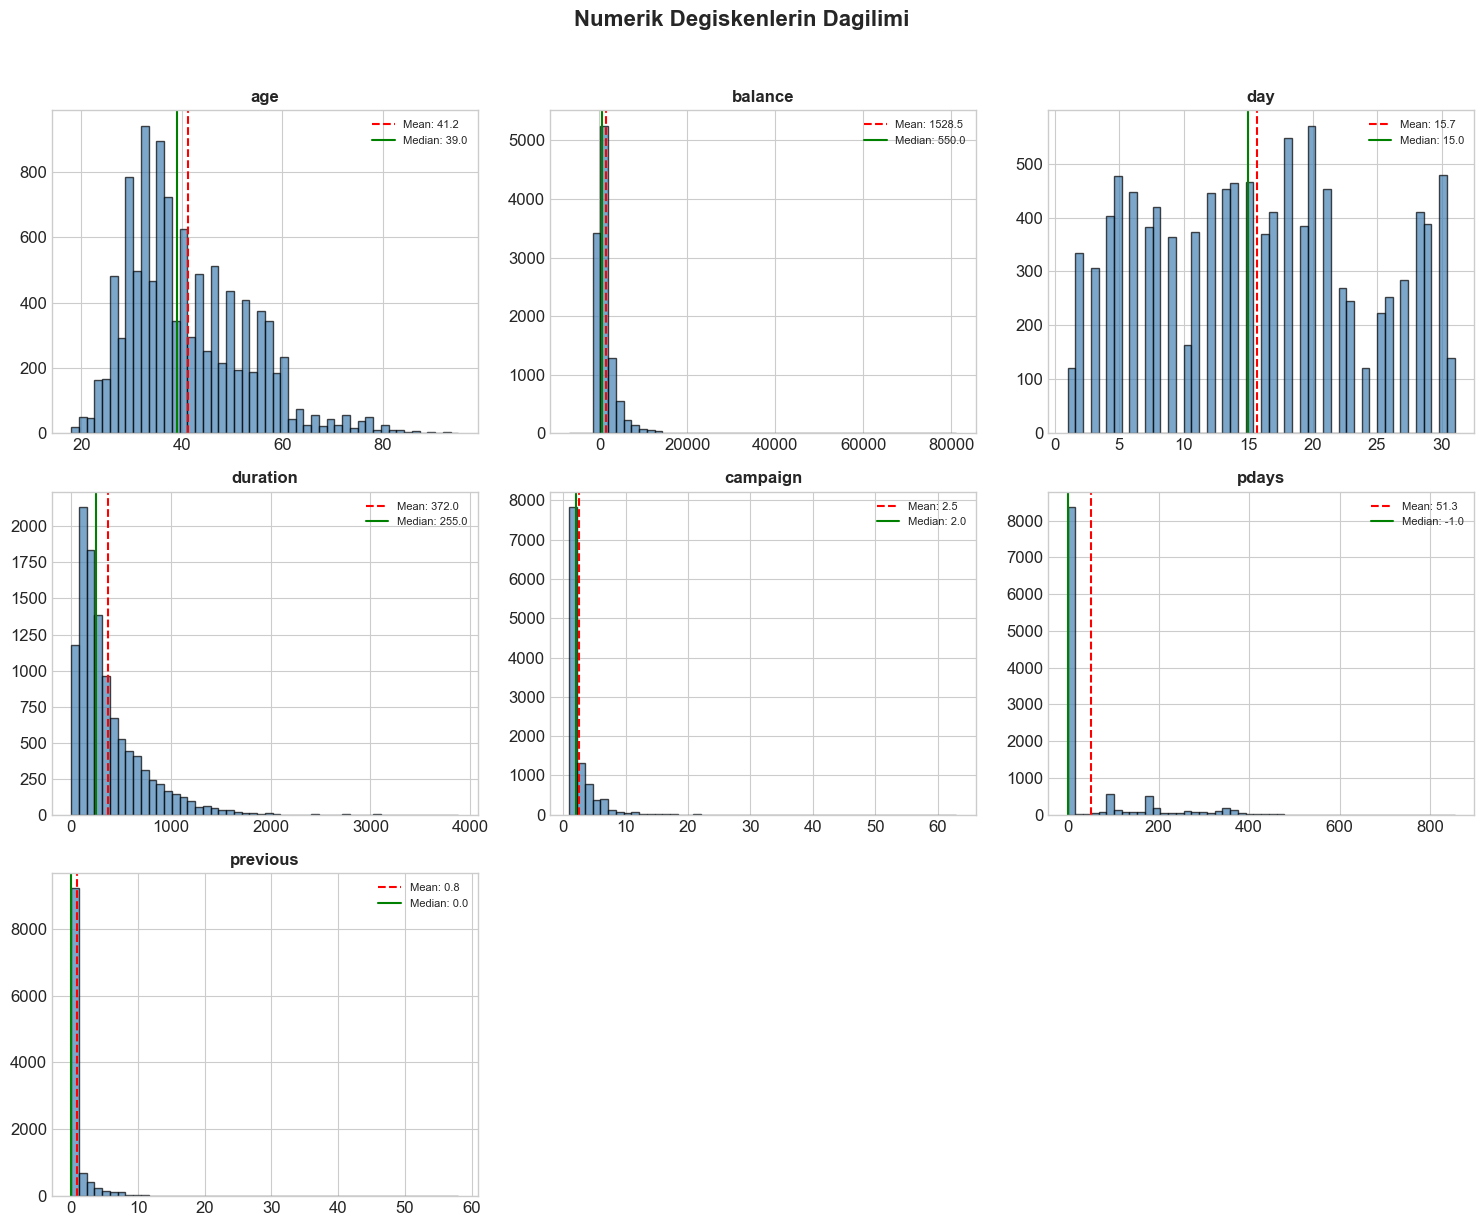

In [13]:
# Dagilim grafikleri
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    ax = axes[i]
    df[col].hist(bins=50, ax=ax, color='steelblue', edgecolor='black', alpha=0.7)
    ax.set_title(f'{col}', fontsize=12, fontweight='bold')
    ax.set_xlabel('')
    ax.axvline(df[col].mean(), color='red', linestyle='--', label=f'Mean: {df[col].mean():.1f}')
    ax.axvline(df[col].median(), color='green', linestyle='-', label=f'Median: {df[col].median():.1f}')
    ax.legend(fontsize=8)

# Bos subplot'lari kaldir
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Numerik Degiskenlerin Dagilimi', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../docs/numeric_distributions.png', dpi=150, bbox_inches='tight')
plt.show()

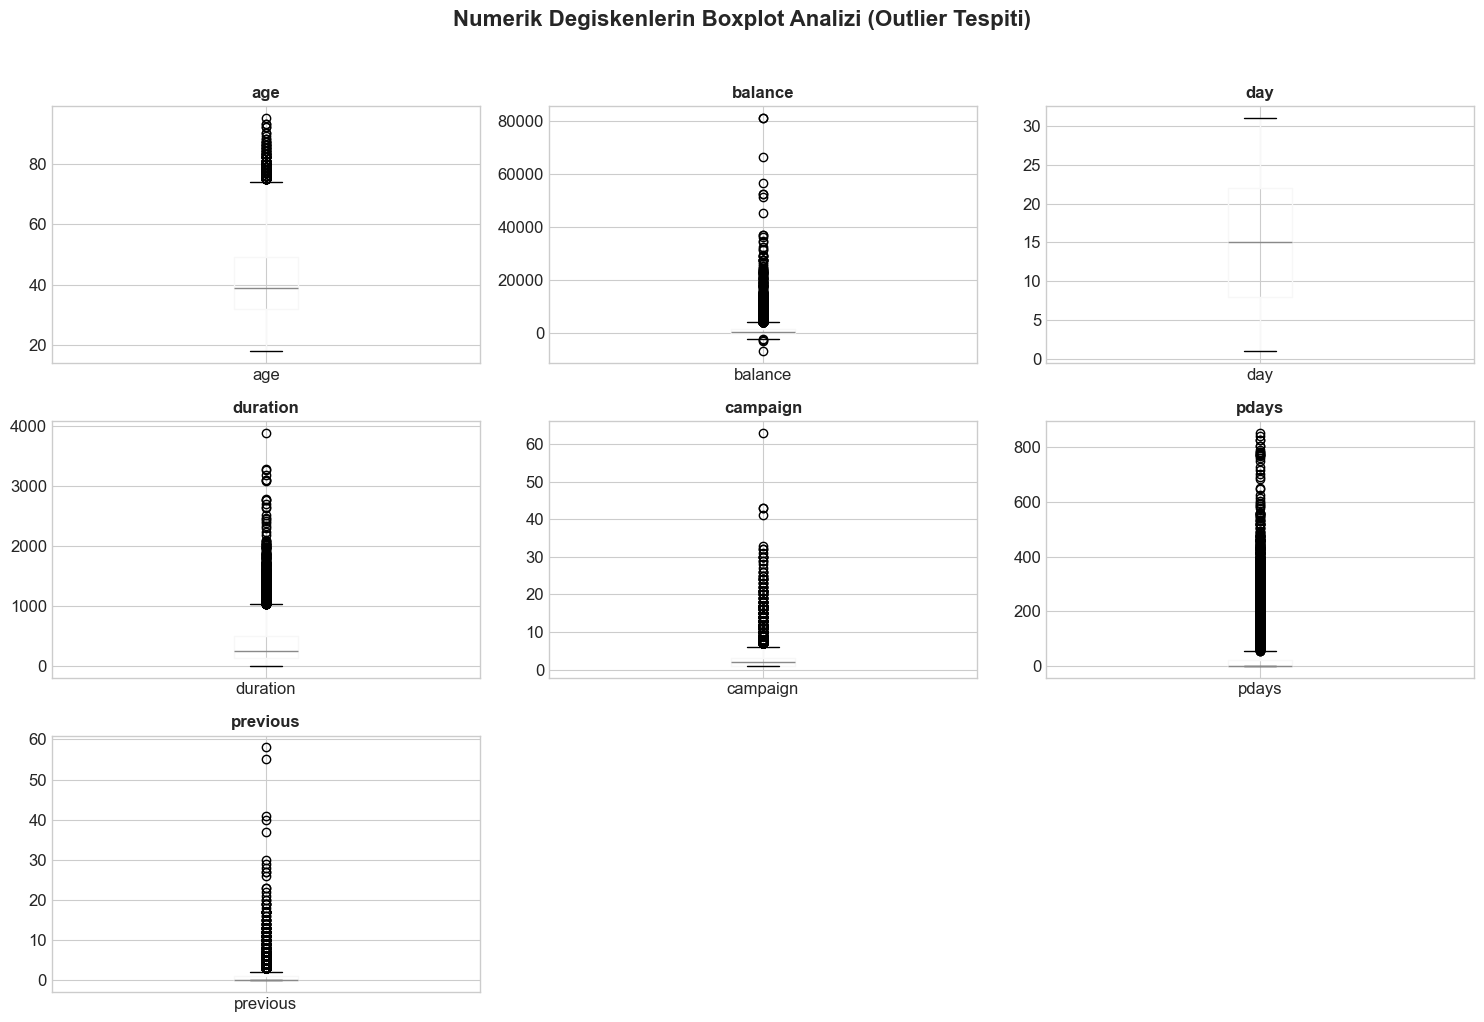

In [14]:
# Boxplot ile outlier analizi
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    ax = axes[i]
    df.boxplot(column=col, ax=ax)
    ax.set_title(f'{col}', fontsize=12, fontweight='bold')

# Bos subplot'lari kaldir
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Numerik Degiskenlerin Boxplot Analizi (Outlier Tespiti)', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [15]:
# Outlier istatistikleri
print('Outlier Analizi (IQR Yontemi):')
print('-' * 50)

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower) | (df[col] > upper)][col]
    if len(outliers) > 0:
        print(f'{col}: {len(outliers):,} outlier ({len(outliers)/len(df)*100:.2f}%)')

Outlier Analizi (IQR Yontemi):
--------------------------------------------------
age: 171 outlier (1.53%)
balance: 1,055 outlier (9.45%)
duration: 636 outlier (5.70%)
campaign: 601 outlier (5.38%)
pdays: 2,750 outlier (24.64%)
previous: 1,258 outlier (11.27%)


### Numerik Degisken Bulgulari

1. **age (Yas):**
   - Dagilim normal'e yakin
   - Ortalama: ~41, Min: 18, Max: 95

2. **balance (Bakiye):**
   - Saga carpik (right-skewed) dagilim
   - Negatif bakiyeler var (borclu musteriler)
   - Outlier'lar mevcut

3. **duration (Gorusme Suresi):**
   - **ONEMLI:** Bu feature production'da bilinmez!
   - Saga carpik dagilim
   - Uzun gorusmeler genellikle basariyla sonuclaniyor

4. **campaign (Arama Sayisi):**
   - Cogu musteri 1-3 kez aranmis
   - Bazi musteriler cok fazla aranmis (outlier)

5. **pdays:**
   - -1 degeri: Daha once hic aranmamis
   - Bu ozel bir flag olarak kullanilabilir

6. **previous:**
   - Cogu musteri daha once hic aranmamis (0)

---
## 5. Kategorik Degisken Analizi

In [16]:
# Kategorik sutunlar
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f'Kategorik sutun sayisi: {len(cat_cols)}')
print(f'Sutunlar: {cat_cols}')

Kategorik sutun sayisi: 10
Sutunlar: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']


In [17]:
# Kardinalite (benzersiz deger sayisi)
print('Kategorik Degisken Kardinaliteleri:')
print('-' * 40)
for col in cat_cols:
    print(f'{col}: {df[col].nunique()} benzersiz deger')
    print(f'   Degerler: {df[col].unique()}')
    print()

Kategorik Degisken Kardinaliteleri:
----------------------------------------
job: 12 benzersiz deger
   Degerler: ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']

marital: 3 benzersiz deger
   Degerler: ['married' 'single' 'divorced']

education: 4 benzersiz deger
   Degerler: ['secondary' 'tertiary' 'primary' 'unknown']

default: 2 benzersiz deger
   Degerler: ['no' 'yes']

housing: 2 benzersiz deger
   Degerler: ['yes' 'no']

loan: 2 benzersiz deger
   Degerler: ['no' 'yes']

contact: 3 benzersiz deger
   Degerler: ['unknown' 'cellular' 'telephone']

month: 12 benzersiz deger
   Degerler: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

poutcome: 4 benzersiz deger
   Degerler: ['unknown' 'other' 'failure' 'success']

deposit: 2 benzersiz deger
   Degerler: ['yes' 'no']



IndexError: index 9 is out of bounds for axis 0 with size 9

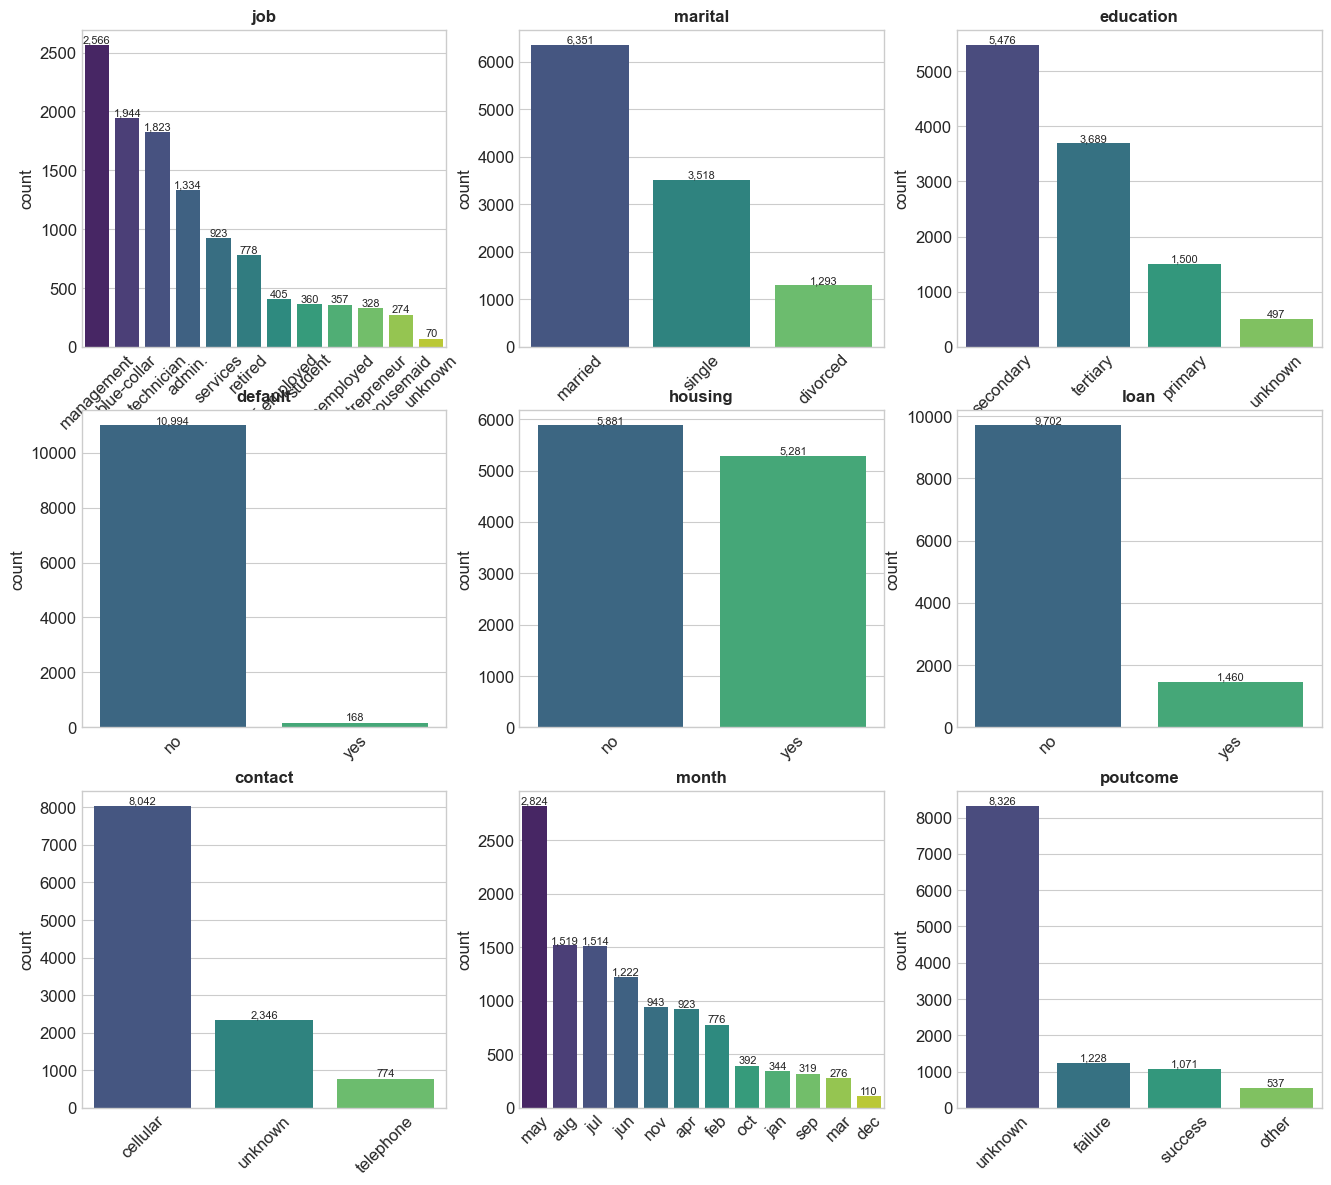

In [18]:
# Kategorik degisken dagilimi
fig, axes = plt.subplots(3, 3, figsize=(16, 14))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    ax = axes[i]
    order = df[col].value_counts().index
    sns.countplot(data=df, x=col, ax=ax, order=order, palette='viridis')
    ax.set_title(f'{col}', fontsize=12, fontweight='bold')
    ax.set_xlabel('')
    ax.tick_params(axis='x', rotation=45)
    
    # Deger etiketleri
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height()):,}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=8)

# Bos subplot'lari kaldir
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Kategorik Degiskenlerin Dagilimi', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../docs/categorical_distributions.png', dpi=150, bbox_inches='tight')
plt.show()

### Kategorik Degisken Bulgulari

1. **job (Meslek):**
   - En yaygin: blue-collar, management, technician
   - 12 farkli meslek kategorisi

2. **marital (Medeni Durum):**
   - Cogunluk evli (married)
   - 3 kategori: married, single, divorced

3. **education (Egitim):**
   - En yaygin: secondary
   - "unknown" degerleri var

4. **default (Temerrut):**
   - Buyuk cogunluk "no"
   - Dengesiz sinif

5. **housing (Konut Kredisi):**
   - Yaklasik yarisinin konut kredisi var

6. **loan (Bireysel Kredi):**
   - Cogunlugun bireysel kredisi yok

7. **contact (Iletisim Turu):**
   - cellular en yaygin
   - "unknown" orani yuksek

8. **month (Ay):**
   - Mayis ayi en yogun
   - Mevsimsellik olabilir

9. **poutcome (Onceki Kampanya Sonucu):**
   - "unknown" orani cok yuksek
   - Cogu musteri ilk kez araniyor

---
## 6. Korelasyon Analizi

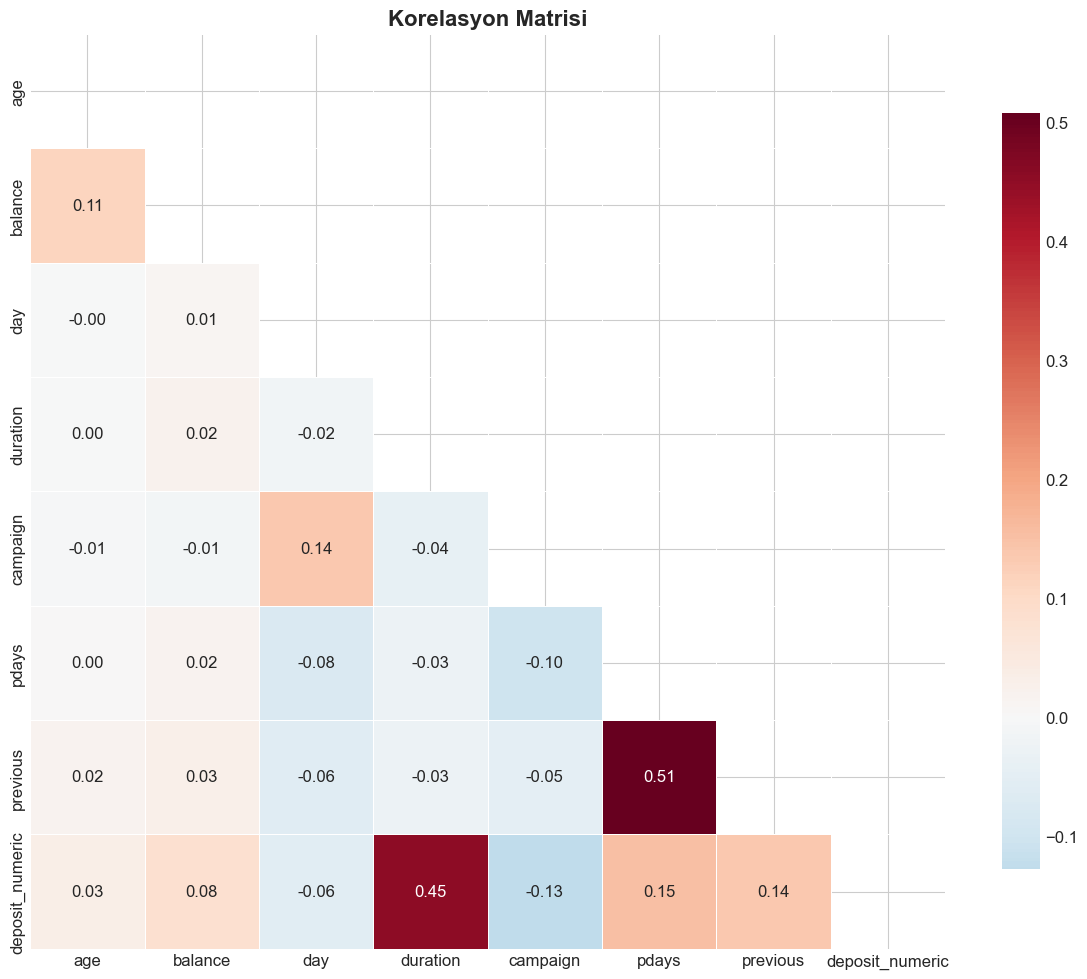

In [19]:
# Target'i numerik yap
df['deposit_numeric'] = (df['deposit'] == 'yes').astype(int)

# Korelasyon matrisi
corr_cols = num_cols + ['deposit_numeric']
corr_matrix = df[corr_cols].corr()

# Heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', 
            cmap='RdBu_r', center=0, square=True,
            linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Korelasyon Matrisi', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('../docs/correlation_matrix.png', dpi=150, bbox_inches='tight')
plt.show()

In [20]:
# Target ile korelasyon
target_corr = corr_matrix['deposit_numeric'].drop('deposit_numeric').sort_values(ascending=False)

print('Target (deposit) ile Korelasyonlar:')
print('=' * 40)
for feature, corr in target_corr.items():
    direction = '+' if corr > 0 else ''
    print(f'{feature:15} : {direction}{corr:.4f}')

Target (deposit) ile Korelasyonlar:
duration        : +0.4519
pdays           : +0.1516
previous        : +0.1399
balance         : +0.0811
age             : +0.0349
day             : -0.0563
campaign        : -0.1281


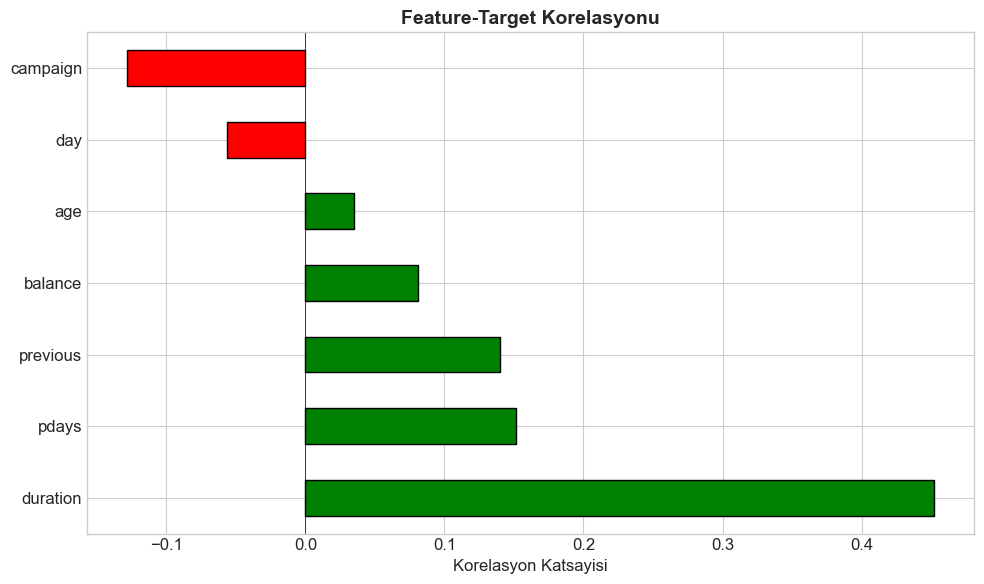

In [21]:
# Target korelasyon bar chart
plt.figure(figsize=(10, 6))
colors = ['green' if x > 0 else 'red' for x in target_corr.values]
target_corr.plot(kind='barh', color=colors, edgecolor='black')
plt.title('Feature-Target Korelasyonu', fontsize=14, fontweight='bold')
plt.xlabel('Korelasyon Katsayisi')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

### Korelasyon Bulgulari

**Target ile Pozitif Korelasyon:**
- `duration`: En guclu korelasyon (ama production'da kullanamayiz!)
- `previous`: Onceki kampanyalarda aranma sayisi
- `pdays`: Onceki kampanyadan bu yana gecen gun

**Target ile Negatif Korelasyon:**
- `campaign`: Cok arama = dusuk donusum
- `day`: Ayin gunu (zayif)

**Feature'lar Arasi Yuksek Korelasyon:**
- `pdays` ve `previous`: Beklenen (onceki kampanya bilgileri)

**Onemli Not:**
`duration` feature'i en yuksek korelasyona sahip ama **production'da kullanilamaz!**

---
## 7. Feature-Target Iliskisi (Detayli)

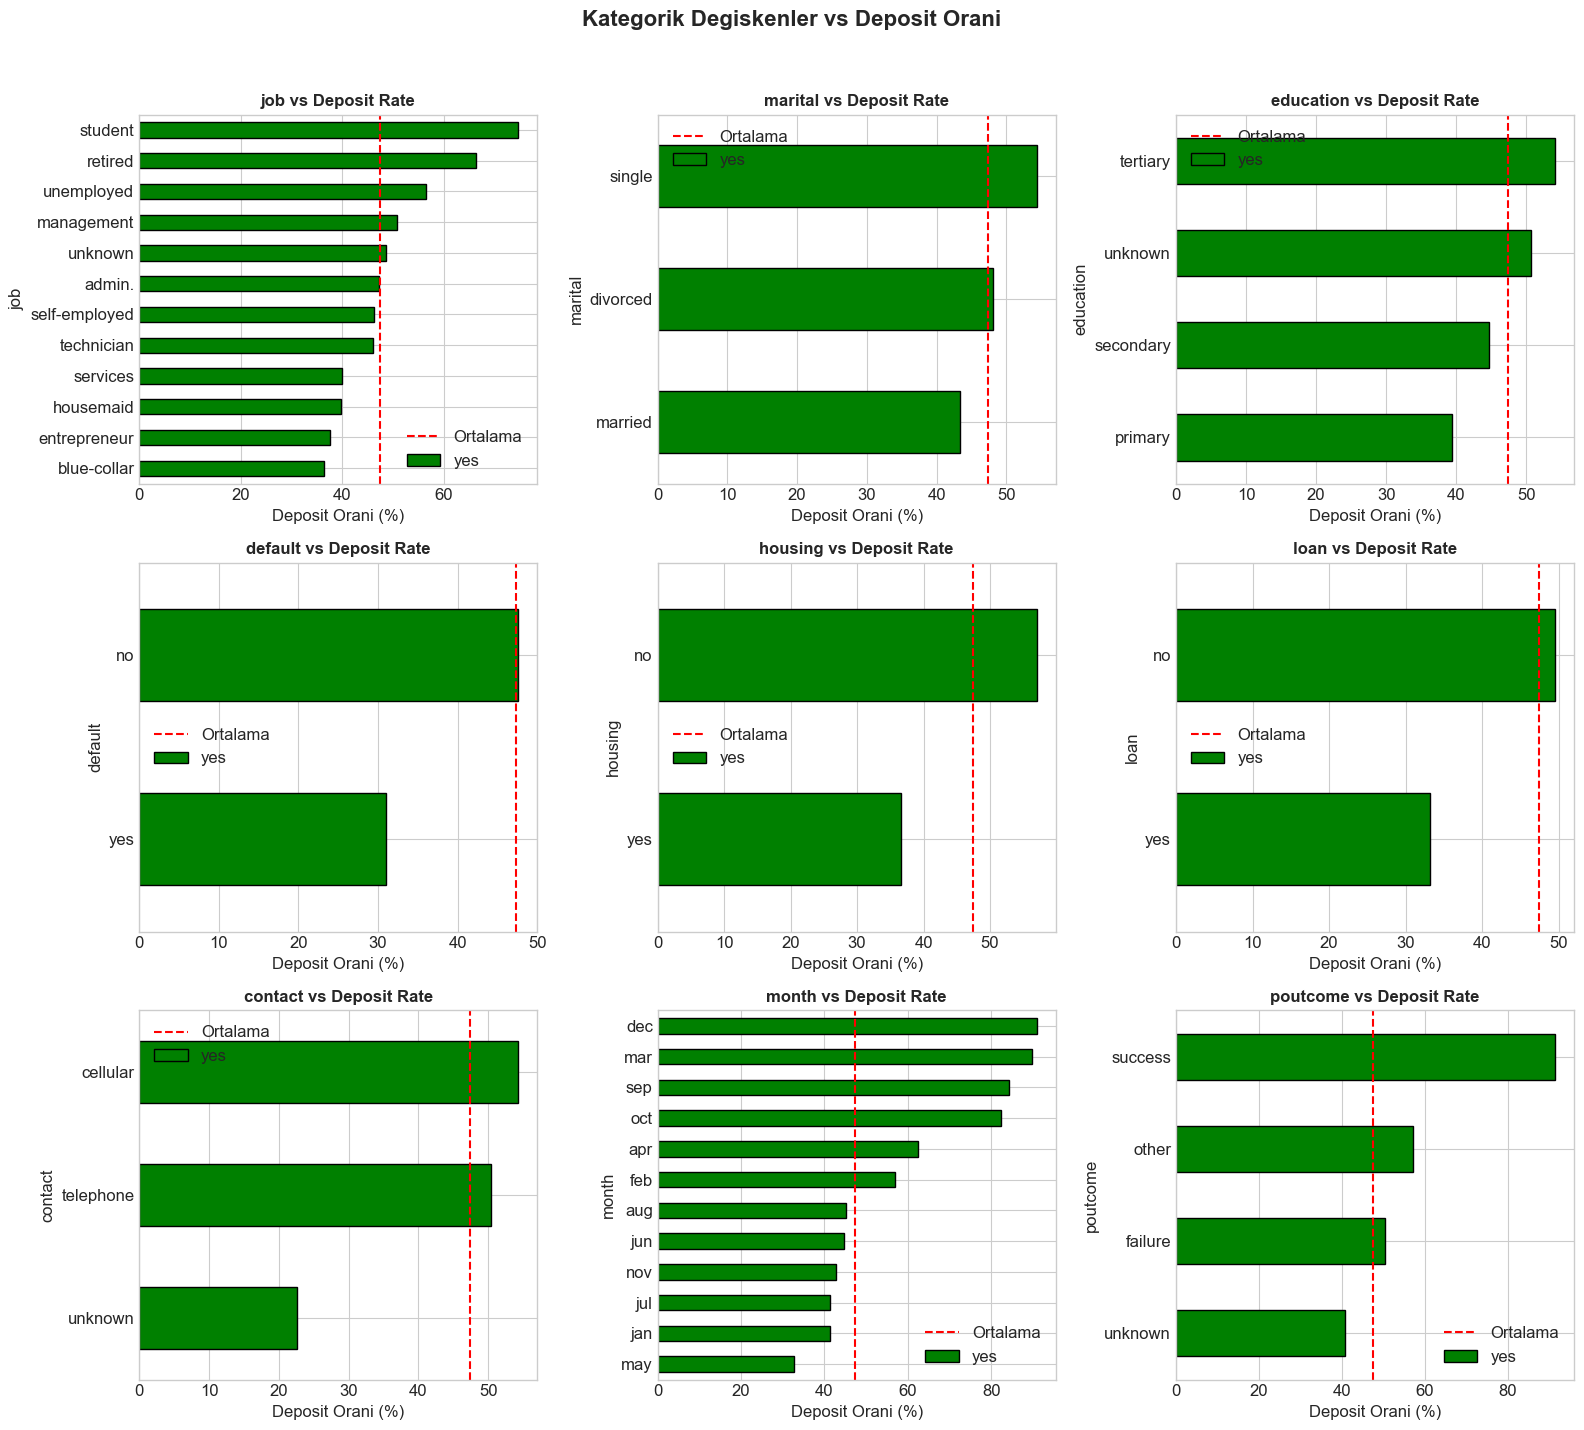

In [23]:
# Kategorik degiskenler vs Target
fig, axes = plt.subplots(3, 3, figsize=(16, 14))
axes = axes.flatten()

for i, col in enumerate(cat_cols[:-1]):  # deposit haric
    ax = axes[i]
    
    # Crosstab orani
    ct = pd.crosstab(df[col], df['deposit'], normalize='index') * 100
    ct['yes'].sort_values(ascending=True).plot(kind='barh', ax=ax, color='green', edgecolor='black')
    
    ax.set_title(f'{col} vs Deposit Rate', fontsize=12, fontweight='bold')
    ax.set_xlabel('Deposit Orani (%)')
    ax.axvline(x=df['deposit_numeric'].mean()*100, color='red', linestyle='--', label='Ortalama')
    ax.legend()

# Bos subplot'lari kaldir
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Kategorik Degiskenler vs Deposit Orani', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../docs/categorical_vs_target.png', dpi=150, bbox_inches='tight')
plt.show()

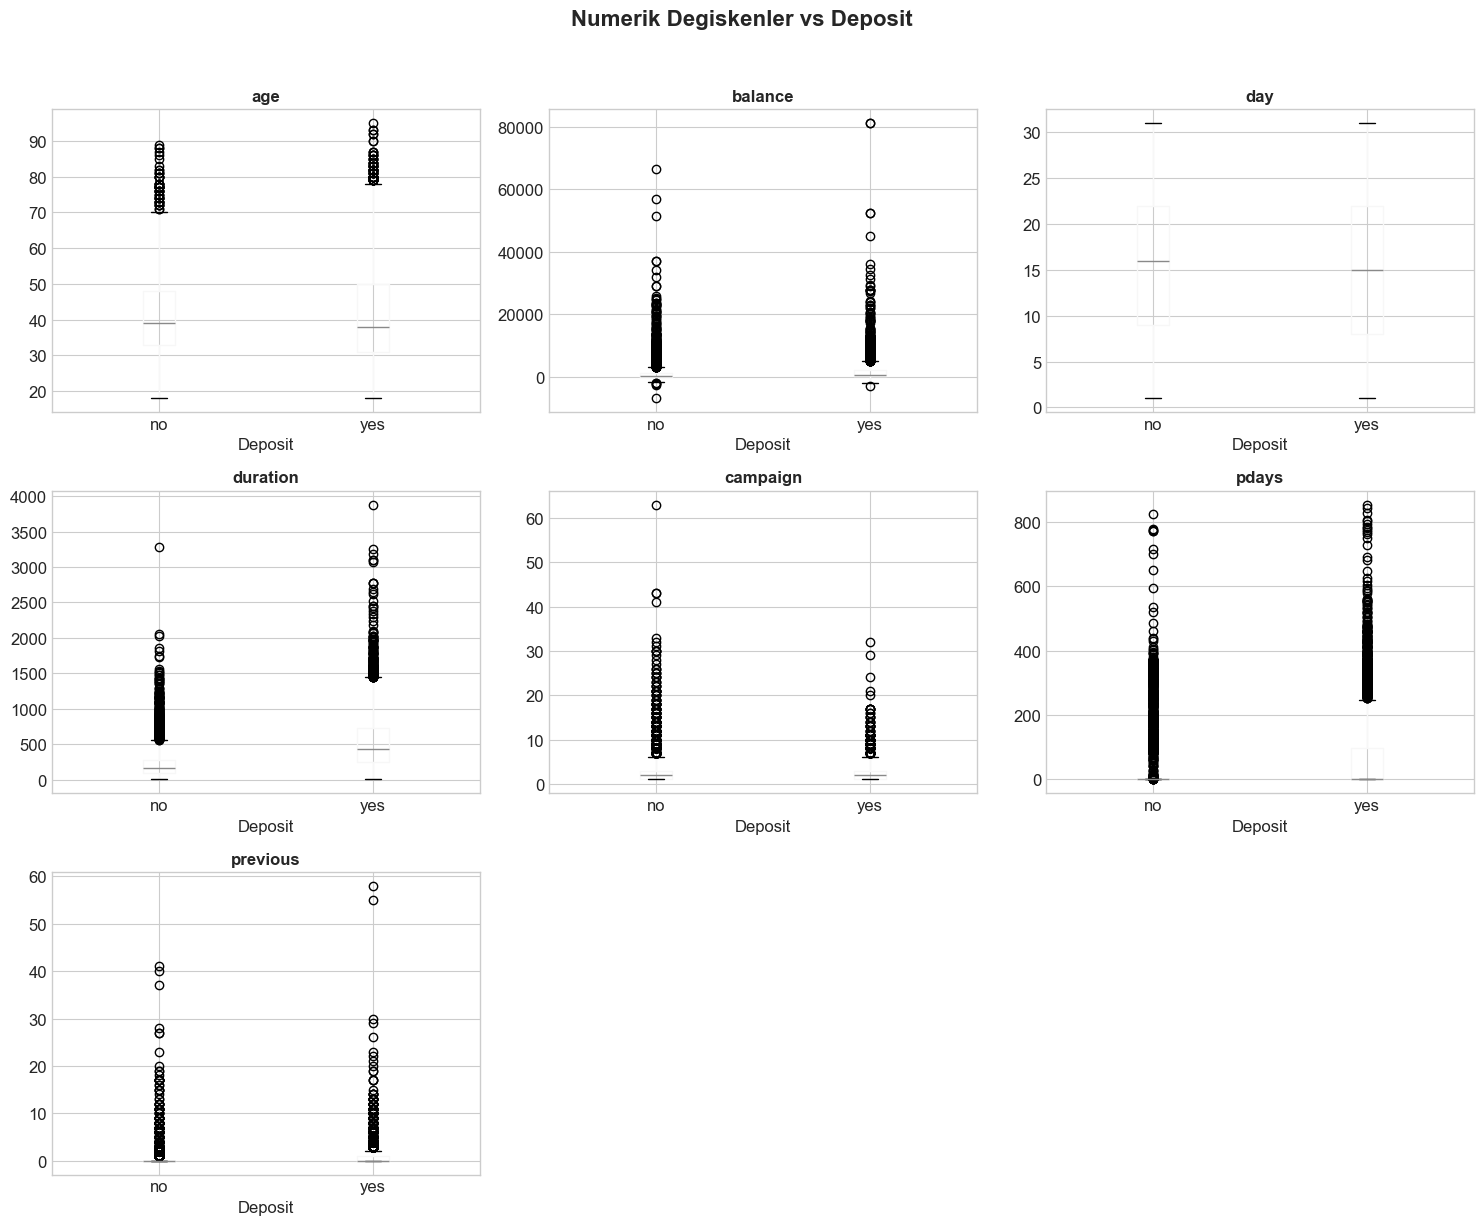

In [24]:
# Numerik degiskenler vs Target (boxplot)
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    ax = axes[i]
    df.boxplot(column=col, by='deposit', ax=ax)
    ax.set_title(f'{col}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Deposit')

# Bos subplot'lari kaldir
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Numerik Degiskenler vs Deposit', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../docs/numeric_vs_target.png', dpi=150, bbox_inches='tight')
plt.show()

<Figure size 1000x600 with 0 Axes>

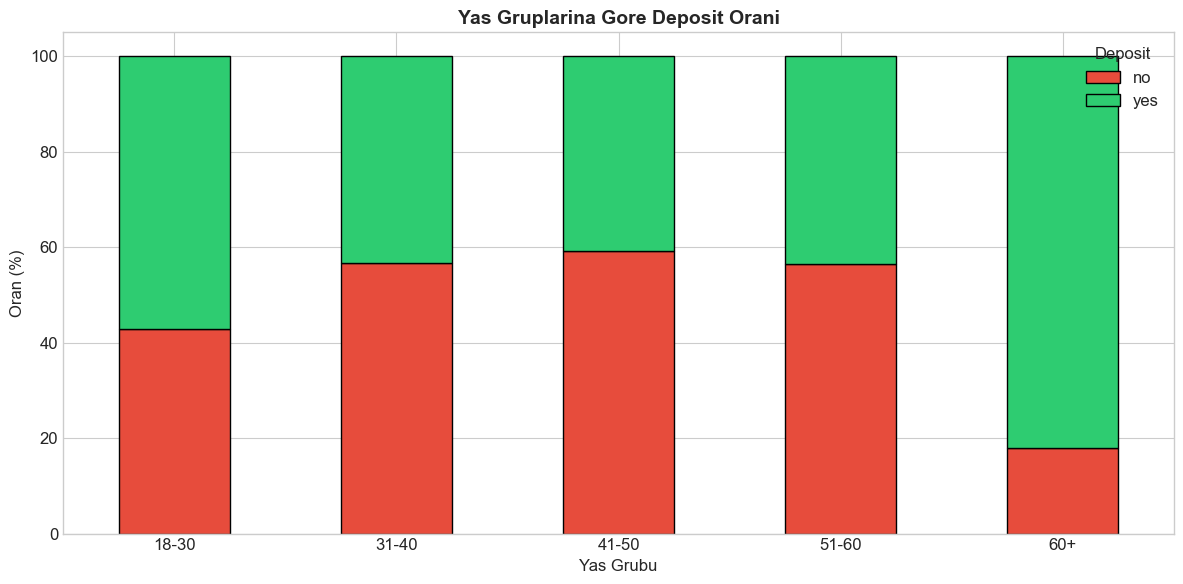

Yas Gruplarina Gore Deposit Orani:
age_group
18-30    57.05
31-40    43.27
41-50    40.83
51-60    43.60
60+      82.16
Name: yes, dtype: float64


In [25]:
# Yas gruplari analizi
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 40, 50, 60, 100], 
                         labels=['18-30', '31-40', '41-50', '51-60', '60+'])

age_deposit = pd.crosstab(df['age_group'], df['deposit'], normalize='index') * 100

plt.figure(figsize=(10, 6))
age_deposit.plot(kind='bar', stacked=True, color=['#e74c3c', '#2ecc71'], edgecolor='black')
plt.title('Yas Gruplarina Gore Deposit Orani', fontsize=14, fontweight='bold')
plt.xlabel('Yas Grubu')
plt.ylabel('Oran (%)')
plt.legend(title='Deposit', loc='upper right')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print('Yas Gruplarina Gore Deposit Orani:')
print(age_deposit['yes'].round(2))

### Feature-Target Iliskisi Bulgulari

**Yuksek Donusum Oranlari:**
- `poutcome = success`: Onceki kampanyada basarili olanlar
- `contact = cellular`: Cep telefonundan ulasilanlar
- `job = student, retired`: Ogrenciler ve emekliler
- `month = mar, sep, oct, dec`: Bazi aylar daha iyi

**Dusuk Donusum Oranlari:**
- `poutcome = failure`: Onceki kampanyada basarisiz olanlar
- `job = blue-collar`: Mavi yakalilar
- `default = yes`: Temerrut gecmisi olanlar

**Yas Analizi:**
- Genc (18-30) ve yasli (60+) musteriler daha yuksek donusum
- Orta yaslilar (31-50) daha dusuk donusum

---
## 8. Bulgular ve Sonuc

In [26]:
# Gecici sutunlari kaldir
df.drop(['deposit_numeric', 'age_group'], axis=1, inplace=True, errors='ignore')

# Ozet istatistikler
print('='*60)
print('VERI SETI OZETI')
print('='*60)
print(f'Toplam satir: {len(df):,}')
print(f'Toplam sutun: {len(df.columns)}')
print(f'Numerik sutun: {len(num_cols)}')
print(f'Kategorik sutun: {len(cat_cols)}')
print(f'Eksik deger: {df.isnull().sum().sum()}')
print(f'\nTarget Dagilimi:')
print(f'  - Yes (Deposit): {(df["deposit"]=="yes").sum():,} ({(df["deposit"]=="yes").mean()*100:.1f}%)')
print(f'  - No (No Deposit): {(df["deposit"]=="no").sum():,} ({(df["deposit"]=="no").mean()*100:.1f}%)')
print('='*60)

VERI SETI OZETI
Toplam satir: 11,162
Toplam sutun: 17
Numerik sutun: 7
Kategorik sutun: 10
Eksik deger: 0

Target Dagilimi:
  - Yes (Deposit): 5,289 (47.4%)
  - No (No Deposit): 5,873 (52.6%)


## Onemli Bulgular Ozeti

### 1. Veri Kalitesi
- Eksik deger YOK (teknik olarak)
- "unknown" degerleri bazi sutunlarda mevcut
- Outlier'lar balance ve duration'da belirgin

### 2. Target Dagilimi
- Yaklasik dengeli (~47% yes, ~53% no)
- Ozel dengeleme teknikleri zorunlu degil

### 3. Onemli Feature'lar
- **duration**: En guclu tahmin edici AMA production'da KULLANILAMAZ!
- **poutcome**: Onceki kampanya basarisi cok onemli
- **contact**: Iletisim turu etkili
- **month**: Mevsimsellik mevcut

### 4. Feature Engineering Onerileri
- Yas gruplari olusturma
- Bakiye kategorileri
- pdays icin "hic aranmadi" flag'i
- Ay bazli mevsimsellik
- Kampanya yogunlugu metrikleri

### 5. Dikkat Edilecekler
- `duration` feature'i gercekci bir production modeli icin **cikarilmali**
- "unknown" degerleri ozel olarak ele alinmali
- Stratified sampling kullanilmali

